In [10]:
import autograd.numpy as np

from bloch.mrf_spoiled_crlb import crb_mrf_objective

%matplotlib notebook

import matplotlib.pyplot as plt

In [11]:
results_dir = '18-11-15' # plot a saved result included in repository

FAs = np.loadtxt('results/' + results_dir + '/temp_FAs.txt')
TRs = np.loadtxt('results/' + results_dir + '/temp_TRs.txt')
fxs = np.loadtxt('results/' + results_dir + '/temp_fx.txt')
df_dFAs = np.loadtxt('results/' + results_dir + '/temp_df_dFAs.txt')
df_dTRs = np.loadtxt('results/' + results_dir + '/temp_df_dTRs.txt')

In [12]:
N =  400
individual_V_matrices = []

TEs = np.ones((N)) * 5.8 # ms

for ii in range(1, FAs.shape[0], 2):
    FA_ii = FAs[ii, :]
    TR_ii = TRs[ii, :]
    
    np_in = np.concatenate((FA_ii, TR_ii), axis=0)
    
    individual_V_matrices.append(crb_mrf_objective(np_in, 1., TEs, 20., 1330., 80., apply_trace=False))


<IPython.core.display.Javascript object>


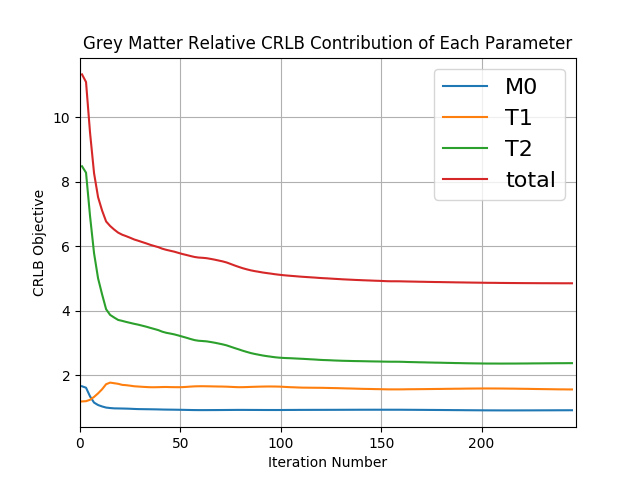

In [16]:
## plot the individual contributions

crlb_m0_list = []
crlb_T1_list = []
crlb_T2_list = []
crlb_total_list = []
for V_matrix in individual_V_matrices:
    crlb_m0_list.append(V_matrix[0])
    crlb_T1_list.append(V_matrix[1])
    crlb_T2_list.append(V_matrix[2])
    crlb_total_list.append(np.sum(V_matrix))
    
xvals = range(1, FAs.shape[0], 2)
plt.figure()
plt.plot(xvals, crlb_m0_list)
plt.plot(xvals, crlb_T1_list)
plt.plot(xvals, crlb_T2_list)
plt.plot(xvals, crlb_total_list)
plt.title('Grey Matter Relative CRLB Contribution of Each Parameter')
plt.xlabel('Iteration Number')
plt.ylabel('CRLB Objective')
plt.xlim([0, FAs.shape[0]])
plt.legend(['M0', 'T1', 'T2', 'total'], prop={'size':16})
plt.grid()
plt.show()